In [2]:
import pandas as pd
import datetime as dt
import footballData as fd
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime
import time
import Elo as ELO
import seaborn as sns



In [3]:
df1888=pd.read_csv('engsoccerdata2.csv')
startdate=1983
fulldf=df1888[df1888['Season']>=startdate]
fulldf=fulldf.sort_values('Date')
fulldf=fulldf.reset_index()
fulldf['division']=fulldf['division'].astype(int)
fulldf['division'].dtype


/Users/andrewpuopolo/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


dtype('int64')

In [4]:
def WomblesMK(Team):
    if Team=='Milton Keynes Dons':
        return 'Wimbledon'
    else:
        return Team
fulldf['Home']=fulldf.apply(lambda row: WomblesMK(row['home']), axis=1)
fulldf['Away']=fulldf.apply(lambda row: WomblesMK(row['visitor']), axis=1)

In [5]:
for i in range(len(df1888)):
    if df1888['home'][i]=='Milton Keynes Dons':
        df1888['home'][i]='Wimbledon'
    if df1888['visitor'][i]=='Milton Keynes Dons':
        df1888['visitor'][i]='Wimbledon'

/Users/andrewpuopolo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/andrewpuopolo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [190]:
WomblesMK('Arsenal')

'Arsenal'

In [169]:
startdate=1983
fulldf=df1888[df1888['Season']>=startdate]
fulldf=fulldf.sort_values('Date')
fulldf=fulldf.reset_index()
fulldf['division']=fulldf['division'].astype(int)
fulldf['division'].dtype

dtype('int64')

In [6]:
initialrows=[]
for i in range(len(fulldf['home'].unique())):
    Team=fulldf['home'].unique()[i]
    Teamdf=fulldf[fulldf['home']==Team].reset_index()
    Tier=int(Teamdf['tier'][0])
    initialrow=[Team, Tier]
    initialrows.append(initialrow)
print(initialrows)
for a in range(len(initialrows)):
    Elodictionary[initialrows[a][0]]=initvalues[initialrows[a][1]-1]

[['West Ham United', 1], ['Crystal Palace', 2], ['Aston Villa', 1], ['Grimsby Town', 2], ['Rochdale', 4], ['Exeter City', 3], ['Chesterfield', 4], ['Leeds United', 2], ['Nottingham Forest', 1], ['Chester', 4], ['Oldham Athletic', 2], ['Portsmouth', 2], ['Stockport County', 4], ['Bristol City', 4], ['Manchester United', 1], ['Sheffield United', 3], ['Blackpool', 4], ['Swansea City', 2], ['Leyton Orient', 3], ['AFC Bournemouth', 3], ['Aldershot', 4], ['Bolton Wanderers', 3], ['Leicester City', 1], ['Hull City', 3], ['Brentford', 3], ['Southend United', 3], ['Ipswich Town', 1], ['Tranmere Rovers', 4], ['Darlington', 4], ['Chelsea', 2], ['Everton', 1], ['Blackburn Rovers', 2], ['Port Vale', 3], ['Sunderland', 1], ['Oxford United', 3], ['Barnsley', 2], ['Plymouth Argyle', 3], ['Watford', 1], ['Arsenal', 1], ['Carlisle United', 2], ['Wolverhampton Wanderers', 1], ['Halifax Town', 4], ['Doncaster Rovers', 4], ['Charlton Athletic', 2], ['Newport County', 3], ['Peterborough United', 4], ['Newca

NameError: name 'initvalues' is not defined

In [ ]:
initialrows=[]
for i in range(len(teamsstart['home'].unique())):
    Team=teamsstart['home'].unique()[i]
    Teamdf=teamsstart[teamsstart['home']==Team].reset_index()
    Tier=int(Teamdf['tier'][0])
    initialrow=[Team, Tier]
    initialrows.append(initialrow)
print(initialrows)

In [9]:
#Find Optimal K
logliksums=[]
burnin=[]
ks=[]
lengths=[]
for b in range(5,6):
    for k in range(1,100,1):
        print([k, b])
        logliks=[]
        BurnIn=b
        Elodictionary={}
        initvalues=[1750,1500,1250,1000]
        HFA=70
        for a in range(len(initialrows)):
            Elodictionary[initialrows[a][0]]=initvalues[initialrows[a][1]-1]
        for j in range(len(fulldf)):
            Home=fulldf['home'][j]
            Away=fulldf['visitor'][j]
            Division=fulldf['tier'][j]-1
            HomeELO=Elodictionary[Home]
            AwayELO=Elodictionary[Away]
            Elodif=float((HomeELO-AwayELO+HFA)/400)
            E=1/(10**(-1*(Elodif))+1)
            if fulldf['hgoal'][j]>fulldf['vgoal'][j]:
                R=1
                MatchLogLik=np.log(E)
            elif fulldf['hgoal'][j]<fulldf['vgoal'][j]:
                R=0
                MatchLogLik=np.log(1-E)
            else:
                R=.5
                MatchLogLik=np.log(np.sqrt(E*(1-E)))
            PointExchange=(R-E)*k
            Elodictionary[Home]=HomeELO+PointExchange
            Elodictionary[Away]=AwayELO-PointExchange
            if fulldf['Season'][j]>(1982+b):
                logliks.append(MatchLogLik)
        logliksums.append([np.sum(logliks), k, b, len(logliks)])
        print(np.sum(logliks))    

[1, 5]
-41118.1897396
[2, 5]
-38220.5224784
[3, 5]
-37037.2233869
[4, 5]
-36430.4710919
[5, 5]
-36072.2943947
[6, 5]
-35840.1571421
[7, 5]
-35679.2179251
[8, 5]
-35561.9243477
[9, 5]
-35473.2509659
[10, 5]
-35404.4512362
[11, 5]
-35350.138489
[12, 5]
-35306.823087
[13, 5]
-35272.1386044
[14, 5]
-35244.413468
[15, 5]
-35222.4239506
[16, 5]
-35205.2461858
[17, 5]
-35192.1642188
[18, 5]
-35182.6108608
[19, 5]
-35176.1283819
[20, 5]
-35172.3415833
[21, 5]
-35170.9388313
[22, 5]
-35171.6583587
[23, 5]
-35174.2781476
[24, 5]
-35178.6083046
[25, 5]
-35184.4852133
[26, 5]
-35191.7669789
[27, 5]
-35200.3298301
[28, 5]
-35210.0652415
[29, 5]
-35220.8776081
[30, 5]
-35232.6823465
[31, 5]
-35245.4043315
[32, 5]
-35258.9765985
[33, 5]
-35273.3392587
[34, 5]
-35288.4385867
[35, 5]
-35304.2262473
[36, 5]
-35320.6586389
[37, 5]
-35337.6963306
[38, 5]
-35355.3035789
[39, 5]
-35373.4479109
[40, 5]
-35392.0997629
[41, 5]
-35411.2321657
[42, 5]
-35430.8204704
[43, 5]
-35450.8421084
[44, 5]
-35471.2763798


In [18]:
cols=['LogLik', 'k', 'Burn In', '#Games']
loglikdf=pd.DataFrame(logliksums, columns=cols)
loglikdf['LogLik'].plot(kind='line', color='red', legend=True)
plt.xlabel('K Factor')
plt.ylabel('Log Likelihood')
plt.title('Optimal k With 5 Year Burn In')
plt.savefig('1DPlot.png')
#plt.show()

In [157]:
for a in range(len(initialrows)):
    Elodictionary[initialrows[a][0]]=initvalues[initialrows[a][1]-1]
Elodictionary

{'AFC Bournemouth': 1250,
 'AFC Wimbledon': 1000,
 'Accrington': 1000,
 'Aldershot': 1000,
 'Arsenal': 1750,
 'Aston Villa': 1750,
 'Barnet': 1000,
 'Barnsley': 1500,
 'Birmingham City': 1750,
 'Blackburn Rovers': 1500,
 'Blackpool': 1000,
 'Bolton Wanderers': 1250,
 'Boston United': 1000,
 'Bradford City': 1250,
 'Brentford': 1250,
 'Brighton & Hove Albion': 1500,
 'Bristol City': 1000,
 'Bristol Rovers': 1250,
 'Burnley': 1250,
 'Burton Albion': 1000,
 'Bury': 1000,
 'Cambridge United': 1500,
 'Cardiff City': 1500,
 'Carlisle United': 1500,
 'Charlton Athletic': 1500,
 'Chelsea': 1500,
 'Cheltenham': 1000,
 'Chester': 1000,
 'Chesterfield': 1000,
 'Colchester United': 1000,
 'Coventry City': 1750,
 'Crawley Town': 1000,
 'Crewe Alexandra': 1000,
 'Crystal Palace': 1500,
 'Dagenham and Redbridge': 1000,
 'Darlington': 1000,
 'Derby County': 1500,
 'Doncaster Rovers': 1000,
 'Everton': 1750,
 'Exeter City': 1250,
 'Fleetwood Town': 1000,
 'Fulham': 1500,
 'Gillingham': 1250,
 'Grimsby 

In [194]:
Elodictionary

{'AFC Bournemouth': 1453.635367272659,
 'AFC Wimbledon': 1054.166807639063,
 'Accrington': 1088.2814947442657,
 'Aldershot': 1056.070636790049,
 'Arsenal': 1844.116036808582,
 'Aston Villa': 1586.6349776751088,
 'Barnet': 1038.140331795783,
 'Barnsley': 1366.626998570867,
 'Birmingham City': 1387.3329792388165,
 'Blackburn Rovers': 1517.492020592202,
 'Blackpool': 1378.3543247804562,
 'Bolton Wanderers': 1493.8072302934156,
 'Boston United': 1027.1699106435792,
 'Bradford City': 1211.7192163291606,
 'Brentford': 1392.1451541902647,
 'Brighton & Hove Albion': 1525.306064958595,
 'Bristol City': 1305.878432687512,
 'Bristol Rovers': 1044.0068261165977,
 'Burnley': 1585.149845028495,
 'Burton Albion': 1135.6327294188386,
 'Bury': 1132.4257578860488,
 'Cambridge United': 1010.8746291763731,
 'Cardiff City': 1530.6669270210514,
 'Carlisle United': 1175.9380853440937,
 'Charlton Athletic': 1433.303681096757,
 'Chelsea': 1856.5279357850711,
 'Cheltenham': 1080.511801763877,
 'Chester': 959.95

In [ ]:
rows=[]
cols=['k', 'burn in','loglik', 'Length']
for i in range(len(logliksums)):
    rows.append([logliksums[i][1], logliksums[i][2], logliksums[i][0], logliksums[i][3]])
plottingdf=pd.DataFrame(rows, columns=cols)

In [ ]:
plottingdf[plottingdf['burn in']==10]

In [ ]:
minkrow=[]
cols2=['k', 'Min LogLik']
for i in range(2,14):
    newdf=plottingdf[plottingdf['burn in']==i].reset_index()
    loglikmin=newdf.loc[newdf['loglik'].idxmax()]
    print(loglikmin['burn in'], loglikmin['k'])
    minkrow.append([loglikmin['burn in'], loglikmin['k']])

minks=pd.DataFrame(minkrow,columns=cols2)


In [ ]:
minks['Min LogLik'].plot(kind='line', color='red', label='Log Likelihood', legend=True)
plt.xlabel('Burn In Period')
plt.ylabel('Optimal k')
plt.title('Optimal k by Burn In Period Using Log Likelihood and Brier as Inputs')
plt.show()

In [ ]:
loglikmin

In [ ]:
for j in range(14):
    newdf=plottingdf[plottingdf['burn in']==j].reset_index()
    x=newdf['k']
    y=newdf['loglik']
    plt.plot(x, y)
    plt.xlabel('K')
    plt.ylabel('Log Likelihood')
    plt.title('Log Likelihood/Brier by k with Burn In Period Of ' + str(j) + ' Years')
    plt.show()

In [ ]:
#Find Optimal K with exponential burn in
logliksums2=[]
ps=[30,45, 60, 75, 90, 100, 120, 150]
bs=[2,3,4,5]
for b in bs:
    for p in ps:
        for k in range(15,30,1):
            print([p,b,k])
            logliks=[]
            BurnIn=b
            Elodictionary={}
            initvalues=[1750,1500,1250,1000]
            HFA=70
            L2Pro=950
            initlen=len(fulldf[fulldf['Season']<min(fulldf['Season']+b)])
            r=np.log(k/p)/initlen

            for a in range(len(initialrows)):
                Elodictionary[initialrows[a][0]]=initvalues[initialrows[a][1]-1]

            for j in range(len(fulldf)):
                if(j<initlen):
                    kfactor=p*np.exp(r*j)
                else:
                    kfactor=k
                
                Home=fulldf['home'][j]
                Away=fulldf['visitor'][j]
                Division=fulldf['tier'][j]-1
                HomeELO=Elodictionary[Home]
                AwayELO=Elodictionary[Away]
                Elodif=float((HomeELO-AwayELO+HFA)/400)
                E=1/(10**(-1*(Elodif))+1)
                if fulldf['hgoal'][j]>fulldf['vgoal'][j]:
                    R=1
                    MatchLogLik=np.log(E)
                elif fulldf['hgoal'][j]<fulldf['vgoal'][j]:
                    R=0
                    MatchLogLik=np.log(1-E)
                else:
                    R=.5
                    MatchLogLik=np.log(np.sqrt(E*(1-E)))
                PointExchange=(R-E)*kfactor
                Elodictionary[Home]=HomeELO+PointExchange
                Elodictionary[Away]=AwayELO-PointExchange
                if fulldf['Season'][j]>(1982+b):
                    logliks.append(MatchLogLik)
            logliksums2.append([np.sum(logliks), k, b, p, len(logliks)])
            print(np.sum(logliks))


In [158]:
logliksums3=[]
for k in range(1,60):
    Elodictionary={}
    initvalues=[1500,1500,1500,1500]
    HFA=70
    L2Pro=1500
    for a in range(len(initialrows)):
        Elodictionary[initialrows[a][0]]=initvalues[initialrows[a][1]-1]
    for i in range(1983,2014,1):
        logliks=[]
        partdf=fulldf[fulldf['Season']==i].reset_index()
        for j in range(len(partdf)):
            Home=partdf['home'][j]
            Away=partdf['visitor'][j]
            Division=partdf['tier'][j]-1
            HomeELO=Elodictionary[Home]
            AwayELO=Elodictionary[Away]
            Elodif=float((HomeELO-AwayELO+HFA)/400)
            E=1/(10**(-1*(Elodif))+1)
            if partdf['hgoal'][j]>partdf['vgoal'][j]:
                R=1
                MatchLogLik=np.log(E)
            elif partdf['hgoal'][j]<partdf['vgoal'][j]:
                R=0
                MatchLogLik=np.log(1-E)
            else:
                R=.5
                MatchLogLik=np.log(np.sqrt(E*(1-E)))
            PointExchange=(R-E)*k
            Elodictionary[Home]=HomeELO+PointExchange
            Elodictionary[Away]=AwayELO-PointExchange
            logliks.append(MatchLogLik)
        logliksums3.append([np.mean(logliks), i, k])
        print([np.mean(logliks), i, k])


[-0.65559575205823917, 1983, 1]
[-0.65889753746280355, 1984, 1]
[-0.65970369598341327, 1985, 1]
[-0.66069337199495382, 1986, 1]
[-0.67140919509757868, 1987, 1]
[-0.66678078044816291, 1988, 1]
[-0.6684413473714037, 1989, 1]
[-0.66082992437646504, 1990, 1]
[-0.66654078532849692, 1991, 1]
[-0.67222300001331614, 1992, 1]
[-0.67242627715699865, 1993, 1]
[-0.66740694971165992, 1994, 1]
[-0.66908306669370954, 1995, 1]
[-0.6672638184894365, 1996, 1]
[-0.66127130952340807, 1997, 1]
[-0.67308369329181539, 1998, 1]
[-0.66952340899633722, 1999, 1]
[-0.6637501711586592, 2000, 1]
[-0.66470405036708324, 2001, 1]
[-0.67416712880917817, 2002, 1]
[-0.67171697589959611, 2003, 1]
[-0.6705266732030486, 2004, 1]
[-0.67333280461678535, 2005, 1]
[-0.67051578461564443, 2006, 1]
[-0.67732922757825698, 2007, 1]
[-0.67176960304998501, 2008, 1]
[-0.661175039136779, 2009, 1]
[-0.67554654355937949, 2010, 1]
[-0.67681552353944474, 2011, 1]
[-0.68205020063667521, 2012, 1]
[-0.67910417017267599, 2013, 1]
[-0.6538200773

[-0.66574295273170014, 1992, 9]
[-0.66212779448606696, 1993, 9]
[-0.6536631757605611, 1994, 9]
[-0.66478181590726937, 1995, 9]
[-0.66312895877782874, 1996, 9]
[-0.6514919968169478, 1997, 9]
[-0.66179089276374659, 1998, 9]
[-0.65184556201092569, 1999, 9]
[-0.65164738149187584, 2000, 9]
[-0.64979612464777847, 2001, 9]
[-0.66332157375425493, 2002, 9]
[-0.66129270911268845, 2003, 9]
[-0.66085476210152527, 2004, 9]
[-0.6661617212714378, 2005, 9]
[-0.66130154458526413, 2006, 9]
[-0.66354039015105537, 2007, 9]
[-0.6576495276450055, 2008, 9]
[-0.64720736570970583, 2009, 9]
[-0.6687990157749687, 2010, 9]
[-0.65963011342134747, 2011, 9]
[-0.67575292890030436, 2012, 9]
[-0.66483225383614797, 2013, 9]
[-0.64493595051348673, 1983, 10]
[-0.64086233126753733, 1984, 10]
[-0.65174644020563288, 1985, 10]
[-0.65326014345947669, 1986, 10]
[-0.66063172821587979, 1987, 10]
[-0.65910404406789558, 1988, 10]
[-0.66279279486982878, 1989, 10]
[-0.6525770796674446, 1990, 10]
[-0.65873809599301847, 1991, 10]
[-0.6

[-0.66588897247320566, 1996, 17]
[-0.64910953861511222, 1997, 17]
[-0.66058319917339392, 1998, 17]
[-0.64983456899677106, 1999, 17]
[-0.65056207524873211, 2000, 17]
[-0.64763011681723714, 2001, 17]
[-0.66234750740473824, 2002, 17]
[-0.66112922410890429, 2003, 17]
[-0.66155405736072592, 2004, 17]
[-0.66571987866400695, 2005, 17]
[-0.66018829140373247, 2006, 17]
[-0.66111524638387076, 2007, 17]
[-0.65746478867524583, 2008, 17]
[-0.6459311219966879, 2009, 17]
[-0.66899137928521935, 2010, 17]
[-0.65922854855587232, 2011, 17]
[-0.67793035522801914, 2012, 17]
[-0.66254073578903272, 2013, 17]
[-0.64166660982524848, 1983, 18]
[-0.63871355608224956, 1984, 18]
[-0.65086608362896214, 1985, 18]
[-0.65063275118956254, 1986, 18]
[-0.65787360794519001, 1987, 18]
[-0.65765442244233507, 1988, 18]
[-0.66336282880822106, 1989, 18]
[-0.65138100435884694, 1990, 18]
[-0.6588230768037695, 1991, 18]
[-0.66555266978800309, 1992, 18]
[-0.66131030745560915, 1993, 18]
[-0.65061702115219944, 1994, 18]
[-0.66364834

[-0.66246296733999754, 1998, 25]
[-0.65107368614435313, 1999, 25]
[-0.65171560176013688, 2000, 25]
[-0.6486657076305109, 2001, 25]
[-0.66361097012460224, 2002, 25]
[-0.6629212433938948, 2003, 25]
[-0.66393595279733775, 2004, 25]
[-0.66744245304016014, 2005, 25]
[-0.66145149088595723, 2006, 25]
[-0.6617201691802046, 2007, 25]
[-0.65980343111759931, 2008, 25]
[-0.64644603559598823, 2009, 25]
[-0.6714178319838604, 2010, 25]
[-0.66149850959544965, 2011, 25]
[-0.68083483794235378, 2012, 25]
[-0.66301957984829996, 2013, 25]
[-0.64110424849740733, 1983, 26]
[-0.63966390610607415, 1984, 26]
[-0.65120145054100809, 1985, 26]
[-0.65115402856744142, 1986, 26]
[-0.65800762307716976, 1987, 26]
[-0.65875233737964356, 1988, 26]
[-0.66572680483591085, 1989, 26]
[-0.65230672524915945, 1990, 26]
[-0.66102253218313689, 1991, 26]
[-0.66758203158045271, 1992, 26]
[-0.66328080594365846, 1993, 26]
[-0.65142026663649277, 1994, 26]
[-0.66421100081835649, 1995, 26]
[-0.6697818784708357, 1996, 26]
[-0.64995920746

[-0.6539267768643533, 2000, 33]
[-0.65108381194499065, 2001, 33]
[-0.66587138769812193, 2002, 33]
[-0.66557046060581093, 2003, 33]
[-0.66730812593202349, 2004, 33]
[-0.67006655788681424, 2005, 33]
[-0.66397647253183767, 2006, 33]
[-0.66362842689264123, 2007, 33]
[-0.66315456809144313, 2008, 33]
[-0.64804846541188033, 2009, 33]
[-0.67490444510777714, 2010, 33]
[-0.66449057879050766, 2011, 33]
[-0.68409859538266016, 2012, 33]
[-0.66492736183383561, 2013, 33]
[-0.64197599356863055, 1983, 34]
[-0.64179567778681457, 1984, 34]
[-0.65256130530609091, 1985, 34]
[-0.65320580265434824, 1986, 34]
[-0.65960492712060259, 1987, 34]
[-0.66095272248569137, 1988, 34]
[-0.66899025929828204, 1989, 34]
[-0.65441612153844519, 1990, 34]
[-0.6640504682688011, 1991, 34]
[-0.67050415849334277, 1992, 34]
[-0.66625016422785488, 1993, 34]
[-0.65363672141307405, 1994, 34]
[-0.66584071286348212, 1995, 34]
[-0.67354575303358166, 1996, 34]
[-0.65214075866071286, 1997, 34]
[-0.66595492037189619, 1998, 34]
[-0.65386762

[-0.66876146569659556, 2002, 41]
[-0.66875935937176267, 2003, 41]
[-0.67126657992335637, 2004, 41]
[-0.67318295899980674, 2005, 41]
[-0.66726982478849417, 2006, 41]
[-0.66629376520069672, 2007, 41]
[-0.66701884542609957, 2008, 41]
[-0.65038391549027819, 2009, 41]
[-0.67894513062791195, 2010, 41]
[-0.66779137901865404, 2011, 41]
[-0.68767923303514877, 2012, 41]
[-0.66765689482021295, 2013, 41]
[-0.64369225911690731, 1983, 42]
[-0.6445461288540395, 1984, 42]
[-0.65469097088173567, 1985, 42]
[-0.65599776947423882, 1986, 42]
[-0.66209579288328568, 1987, 42]
[-0.66374028084607639, 1988, 42]
[-0.67276964979721932, 1989, 42]
[-0.65724670051576872, 1990, 42]
[-0.66750218908260861, 1991, 42]
[-0.67395424633636503, 1992, 42]
[-0.66974803572363695, 1993, 42]
[-0.65657790277245243, 1994, 42]
[-0.6681860117008831, 1995, 42]
[-0.67753491664404553, 1996, 42]
[-0.65498229232884342, 1997, 42]
[-0.66959297671577278, 1998, 42]
[-0.65694883818122463, 1999, 42]
[-0.65719082497565429, 2000, 42]
[-0.65458753

[-0.67234135479874557, 2003, 49]
[-0.67558188647745199, 2004, 49]
[-0.67663310000179111, 2005, 49]
[-0.67106258943533303, 2006, 49]
[-0.66947827481325595, 2007, 49]
[-0.6711908582911621, 2008, 49]
[-0.65324438260213735, 2009, 49]
[-0.68332533825237385, 2010, 49]
[-0.6713031433830976, 2011, 49]
[-0.69152895893374933, 2012, 49]
[-0.67092129663514044, 2013, 49]
[-0.64596159579009116, 1983, 50]
[-0.64769821175869047, 1984, 50]
[-0.65737276373662901, 1985, 50]
[-0.65922120747414936, 1986, 50]
[-0.66518570144450473, 1987, 50]
[-0.66691685604610618, 1988, 50]
[-0.67687953330754369, 1989, 50]
[-0.66055775196970623, 1990, 50]
[-0.67121805505378407, 1991, 50]
[-0.67775354570654478, 1992, 50]
[-0.67358596640090951, 1993, 50]
[-0.65994399046492713, 1994, 50]
[-0.67103564020809958, 1995, 50]
[-0.6817255323509791, 1996, 50]
[-0.65821635646254728, 1997, 50]
[-0.67350805089420629, 1998, 50]
[-0.66036684558933267, 1999, 50]
[-0.66057708112450519, 2000, 50]
[-0.65809129304107095, 2001, 50]
[-0.672551599

[-0.67520031465838903, 2006, 57]
[-0.67305463545562727, 2007, 57]
[-0.67557247259907049, 2008, 57]
[-0.65650508103975569, 2009, 57]
[-0.68794694137427659, 2010, 57]
[-0.67499822186454994, 2011, 57]
[-0.69560439405527463, 2012, 57]
[-0.67457637393546455, 2013, 57]
[-0.64863037253501532, 1983, 58]
[-0.65114900241450624, 1984, 58]
[-0.66045867772493472, 1985, 58]
[-0.66275450543904513, 1986, 58]
[-0.6687049992559152, 1987, 58]
[-0.67039327135598448, 1988, 58]
[-0.68122455860591791, 1989, 58]
[-0.66421970471013925, 1990, 58]
[-0.67512834367858965, 1991, 58]
[-0.68180693545785565, 1992, 58]
[-0.67767775336273839, 1993, 58]
[-0.66359507565166875, 1994, 58]
[-0.67426534007886474, 1995, 58]
[-0.68610020963869145, 1996, 58]
[-0.66172808978834718, 1997, 58]
[-0.67761899180171214, 1998, 58]
[-0.6640321657063557, 1999, 58]
[-0.66430963212064831, 2000, 58]
[-0.66183935231519309, 2001, 58]
[-0.67628735967863185, 2002, 58]
[-0.67673672898924286, 2003, 58]
[-0.68071697436924883, 2004, 58]
[-0.68082485

In [159]:
logliksums4=[]
hs=[50,55,60,65,70,75,80,85]
bs=[2,3,4,5,6,7,8,9,10,11,12,13,14]
for h in hs:
    for b in bs:
        for k in range(18,27,1):
            print([b,h,k])
            Briers=[]
            logliks=[]
            Elodictionary={}
            initvalues=[1750,1500,1250,1000]
            HFA=75
            L2Pro=950
            for a in range(len(initialrows)):
                Elodictionary[initialrows[a][0]]=initvalues[initialrows[a][1]-1]
            for j in range(len(fulldf)):
                Home=fulldf['home'][j]
                Away=fulldf['visitor'][j]
                Division=fulldf['tier'][j]-1
                HomeELO=Elodictionary[Home]
                AwayELO=Elodictionary[Away]
                Elodif=float((HomeELO-AwayELO+h)/400)
                E=1/(10**(-1*(Elodif))+1)
                if fulldf['hgoal'][j]>fulldf['vgoal'][j]:
                    R=1
                    MatchLogLik=np.log(E)
                elif fulldf['hgoal'][j]<fulldf['vgoal'][j]:
                    R=0
                    MatchLogLik=np.log(1-E)
                else:
                    R=.5
                    MatchLogLik=np.log(np.sqrt(E*(1-E)))
                PointExchange=(R-E)*k
                Elodictionary[Home]=HomeELO+PointExchange
                Elodictionary[Away]=AwayELO-PointExchange
                if fulldf['Season'][j]>(1982+b):
                    logliks.append(MatchLogLik)
            logliksums4.append([np.sum(logliks), b, h, k])
            print([np.sum(logliks), b, h, k])

[2, 50, 18]
[-39326.266874239955, 2, 50, 18]
[2, 50, 19]
[-39312.50857222989, 2, 50, 19]
[2, 50, 20]
[-39302.591335585392, 2, 50, 20]
[2, 50, 21]
[-39296.036178001974, 2, 50, 21]
[2, 50, 22]
[-39292.444424488051, 2, 50, 22]
[2, 50, 23]
[-39291.481164264667, 2, 50, 23]
[2, 50, 24]
[-39292.862712219729, 2, 50, 24]
[2, 50, 25]
[-39296.346975250453, 2, 50, 25]
[2, 50, 26]
[-39301.725956674847, 2, 50, 26]
[3, 50, 18]
[-37962.330492502435, 3, 50, 18]
[3, 50, 19]
[-37952.197094185227, 3, 50, 19]
[3, 50, 20]
[-37945.384228920127, 3, 50, 20]
[3, 50, 21]
[-37941.486419789457, 3, 50, 21]
[3, 50, 22]
[-37940.166386443576, 3, 50, 22]
[3, 50, 23]
[-37941.14069618025, 3, 50, 23]
[3, 50, 24]
[-37944.169003834686, 3, 50, 24]
[3, 50, 25]
[-37949.045857122779, 3, 50, 25]
[3, 50, 26]
[-37955.59436673305, 3, 50, 26]
[4, 50, 18]
[-36595.183664212425, 4, 50, 18]
[4, 50, 19]
[-36587.567128809169, 4, 50, 19]
[4, 50, 20]
[-36582.907588632872, 4, 50, 20]
[4, 50, 21]
[-36580.854082770871, 4, 50, 21]
[4, 50, 22]
[

[-29747.784923386876, 9, 55, 19]
[9, 55, 20]
[-29746.797148542148, 9, 55, 20]
[9, 55, 21]
[-29747.677237209533, 9, 55, 21]
[9, 55, 22]
[-29750.21866471674, 9, 55, 22]
[9, 55, 23]
[-29754.246598659862, 9, 55, 23]
[9, 55, 24]
[-29759.611810704046, 9, 55, 24]
[9, 55, 25]
[-29766.185989815403, 9, 55, 25]
[9, 55, 26]
[-29773.858084621446, 9, 55, 26]
[10, 55, 18]
[-28379.520692832168, 10, 55, 18]
[10, 55, 19]
[-28376.556170075091, 10, 55, 19]
[10, 55, 20]
[-28375.614046415718, 10, 55, 20]
[10, 55, 21]
[-28376.460067140022, 10, 55, 21]
[10, 55, 22]
[-28378.897266303513, 10, 55, 22]
[10, 55, 23]
[-28382.758531235108, 10, 55, 23]
[10, 55, 24]
[-28387.900953751221, 10, 55, 24]
[10, 55, 25]
[-28394.20146946155, 10, 55, 25]
[10, 55, 26]
[-28401.553442838249, 10, 55, 26]
[11, 55, 18]
[-27026.676549374861, 11, 55, 18]
[11, 55, 19]
[-27023.779226475406, 11, 55, 19]
[11, 55, 20]
[-27022.826498247668, 11, 55, 20]
[11, 55, 21]
[-27023.591744728983, 11, 55, 21]
[11, 55, 22]
[-27025.884418467143, 11, 55, 

[-37890.23192210884, 3, 65, 18]
[3, 65, 19]
[-37879.650979529215, 3, 65, 19]
[3, 65, 20]
[-37872.391699746106, 3, 65, 20]
[3, 65, 21]
[-37868.049512056568, 3, 65, 21]
[3, 65, 22]
[-37866.287771078729, 3, 65, 22]
[3, 65, 23]
[-37866.823472863718, 3, 65, 23]
[3, 65, 24]
[-37869.416543260297, 3, 65, 24]
[3, 65, 25]
[-37873.861679909816, 3, 65, 25]
[3, 65, 26]
[-37879.982050381848, 3, 65, 26]
[4, 65, 18]
[-36531.862064231755, 4, 65, 18]
[4, 65, 19]
[-36523.825474198646, 4, 65, 19]
[4, 65, 20]
[-36518.747448408249, 4, 65, 20]
[4, 65, 21]
[-36516.277740379417, 4, 65, 21]
[4, 65, 22]
[-36516.123679043179, 4, 65, 22]
[4, 65, 23]
[-36518.038166923259, 4, 65, 23]
[4, 65, 24]
[-36521.810698328969, 4, 65, 24]
[4, 65, 25]
[-36527.260520215481, 4, 65, 25]
[4, 65, 26]
[-36534.231342457642, 4, 65, 26]
[5, 65, 18]
[-35182.627415836942, 5, 65, 18]
[5, 65, 19]
[-35176.145691727826, 5, 65, 19]
[5, 65, 20]
[-35172.368605979253, 5, 65, 20]
[5, 65, 21]
[-35170.982956139545, 5, 65, 21]
[5, 65, 22]
[-35171.725

[-28370.537218569818, 10, 70, 19]
[10, 70, 20]
[-28369.323402411028, 10, 70, 20]
[10, 70, 21]
[-28369.90325594462, 10, 70, 21]
[10, 70, 22]
[-28372.079876633812, 10, 70, 22]
[10, 70, 23]
[-28375.686101242904, 10, 70, 23]
[10, 70, 24]
[-28380.57888842827, 10, 70, 24]
[10, 70, 25]
[-28386.634981978143, 10, 70, 25]
[10, 70, 26]
[-28393.747514153612, 10, 70, 26]
[11, 70, 18]
[-27022.477656325638, 11, 70, 18]
[11, 70, 19]
[-27019.30968885219, 11, 70, 19]
[11, 70, 20]
[-27018.091971139398, 11, 70, 20]
[11, 70, 21]
[-27018.598098703194, 11, 70, 21]
[11, 70, 22]
[-27020.637572269461, 11, 70, 22]
[11, 70, 23]
[-27024.048703416142, 11, 70, 23]
[11, 70, 24]
[-27028.693202283226, 11, 70, 24]
[11, 70, 25]
[-27034.451984458959, 11, 70, 25]
[11, 70, 26]
[-27041.221877669017, 11, 70, 26]
[12, 70, 18]
[-25684.901726996657, 12, 70, 18]
[12, 70, 19]
[-25682.35881866292, 12, 70, 19]
[12, 70, 20]
[-25681.637998503251, 12, 70, 20]
[12, 70, 21]
[-25682.525900016415, 12, 70, 21]
[12, 70, 22]
[-25684.843508465

[-36567.305526137054, 4, 80, 18]
[4, 80, 19]
[-36559.029871581202, 4, 80, 19]
[4, 80, 20]
[-36553.714513645966, 4, 80, 20]
[4, 80, 21]
[-36551.010163878585, 4, 80, 21]
[4, 80, 22]
[-36550.624848578162, 4, 80, 22]
[4, 80, 23]
[-36552.311959813, 4, 80, 23]
[4, 80, 24]
[-36555.861315604619, 4, 80, 24]
[4, 80, 25]
[-36561.092354529319, 4, 80, 25]
[4, 80, 26]
[-36567.8488732681, 4, 80, 26]
[5, 80, 18]
[-35218.257321887264, 5, 80, 18]
[5, 80, 19]
[-35211.545468226643, 5, 80, 19]
[5, 80, 20]
[-35207.540705896914, 5, 80, 20]
[5, 80, 21]
[-35205.930687580665, 5, 80, 21]
[5, 80, 22]
[-35206.452999039095, 5, 80, 22]
[5, 80, 23]
[-35208.885017911496, 5, 80, 23]
[5, 80, 24]
[-35213.036277334635, 5, 80, 24]
[5, 80, 25]
[-35218.742612437483, 5, 80, 25]
[5, 80, 26]
[-35225.861602224628, 5, 80, 26]
[6, 80, 18]
[-33866.258105960253, 6, 80, 18]
[6, 80, 19]
[-33860.220016653606, 6, 80, 19]
[6, 80, 20]
[-33856.763287900059, 6, 80, 20]
[6, 80, 21]
[-33855.58965266835, 6, 80, 21]
[6, 80, 22]
[-33856.44840851

[-27087.653875235286, 11, 85, 19]
[11, 85, 20]
[-27086.288350413328, 11, 85, 20]
[11, 85, 21]
[-27086.653848491365, 11, 85, 21]
[11, 85, 22]
[-27088.559985893764, 11, 85, 22]
[11, 85, 23]
[-27091.845033470941, 11, 85, 23]
[11, 85, 24]
[-27096.370548394298, 11, 85, 24]
[11, 85, 25]
[-27102.017214380267, 11, 85, 25]
[11, 85, 26]
[-27108.68157349871, 11, 85, 26]
[12, 85, 18]
[-25752.751978547902, 12, 85, 18]
[12, 85, 19]
[-25750.067860149444, 12, 85, 19]
[12, 85, 20]
[-25749.212373483453, 12, 85, 20]
[12, 85, 21]
[-25749.972357847764, 12, 85, 21]
[12, 85, 22]
[-25752.168827443209, 12, 85, 22]
[12, 85, 23]
[-25755.650135920037, 12, 85, 23]
[12, 85, 24]
[-25760.286774596145, 12, 85, 24]
[12, 85, 25]
[-25765.967354115724, 12, 85, 25]
[12, 85, 26]
[-25772.595458327974, 12, 85, 26]
[13, 85, 18]
[-24390.8548498702, 13, 85, 18]
[13, 85, 19]
[-24388.790497961894, 13, 85, 19]
[13, 85, 20]
[-24388.43953676513, 13, 85, 20]
[13, 85, 21]
[-24389.599550274637, 13, 85, 21]
[13, 85, 22]
[-24392.101200631

In [ ]:
columns=['loglik', 'Burn In', 'Home Field', 'K Factor']
homefielddf=pd.DataFrame(logliksums4, columns=columns)

In [ ]:
minks2

In [ ]:
logliksums2

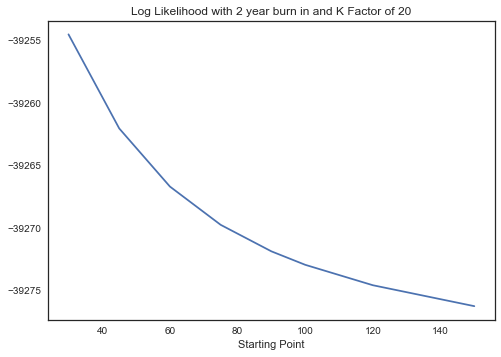

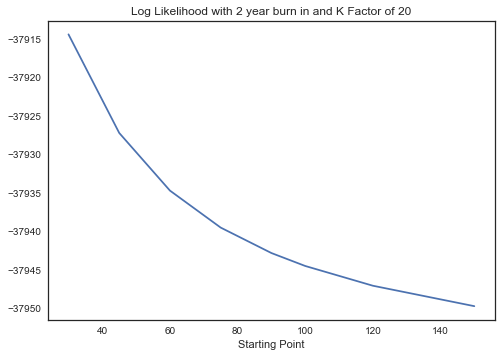

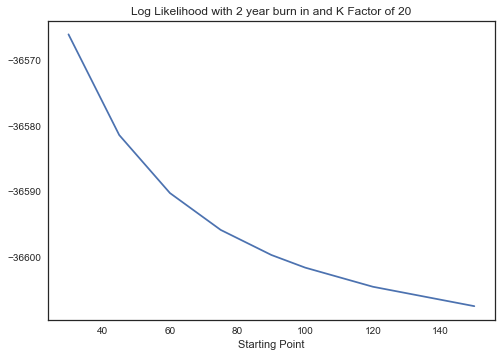

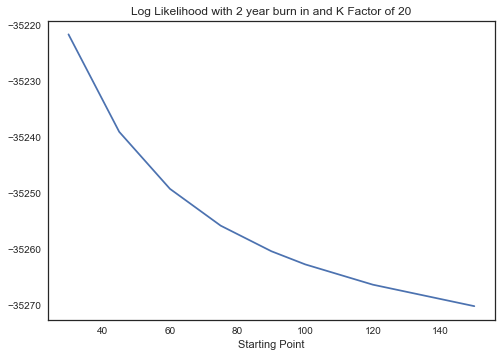

In [133]:
columnsexp=['LogLik','k', 'BurnIn', 'StartPoint', 'NumGames']
for b in range(2,6,1):
    expburns=pd.DataFrame(logliksums2, columns=columnsexp)
    expburns2=expburns[expburns['BurnIn']==b]
    expburns220=expburns2[expburns2['k']==20].reset_index()
    expburns220
    plt.plot(expburns220['StartPoint'],expburns 220['LogLik'])
    plt.xlabel('Starting Point')
    plt.title('Log Likelihood with 2 year burn in and K Factor of 20')
    plt.show()


In [1]:
constantdf
conscols=['AverageLogLik', 'Year', 'KFactor']
constantdf=pd.DataFrame(logliksums3, columns=conscols)
ks=[1,10,15,20,25,30,59]
for k in ks:
    testdf=constantdf[constantdf['KFactor']==k].reset_index()
    plt.plot(testdf['Year'], testdf['AverageLogLik'])
    plt.xlabel('Year')
    plt.ylabel('Average LogLik Per Match')
    plt.title('Average Log Likelihood Per Year with K Factor of ' + str(k))
    
    plt.show()

NameError: name 'constantdf' is not defined

In [145]:
testdf=constantdf[constantdf['KFactor']==20].reset_index()
testdf

,index,AverageLogLik,Year,KFactor
0,589,-0.641340,1983,20
1,590,-0.638779,1984,20
2,591,-0.650842,1985,20
3,592,-0.650545,1986,20
4,593,-0.657718,1987,20
5,594,-0.657772,1988,20
6,595,-0.663835,1989,20
7,596,-0.651463,1990,20
8,597,-0.659253,1991,20
9,598,-0.665942,1992,20


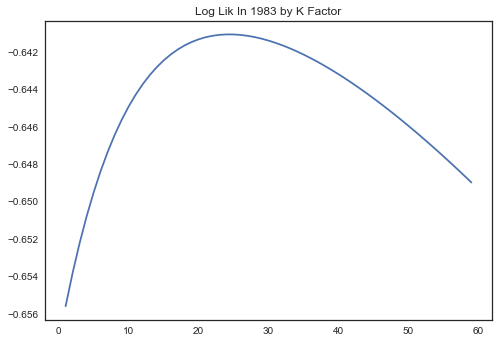

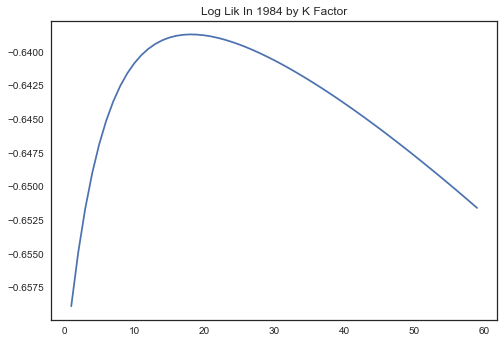

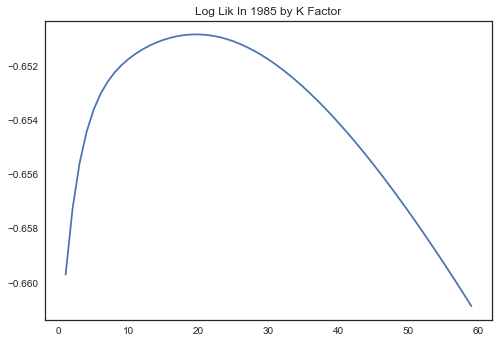

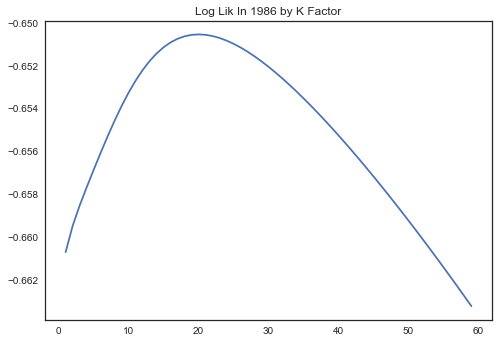

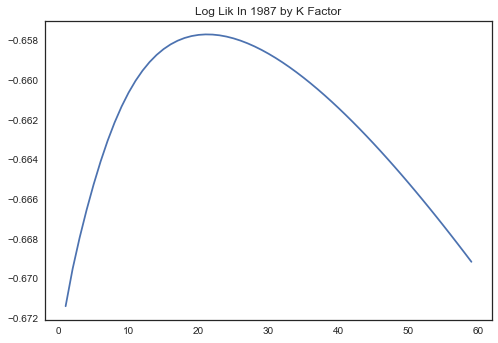

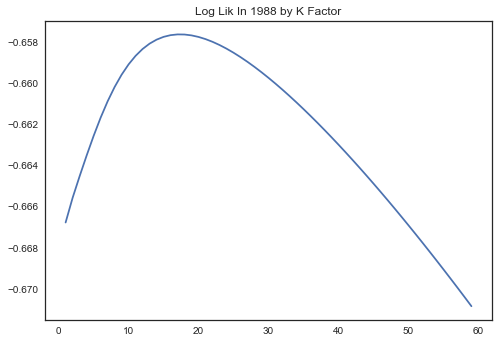

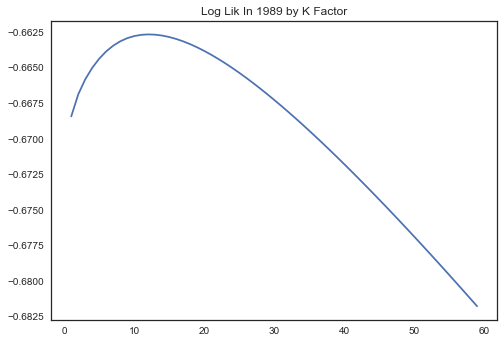

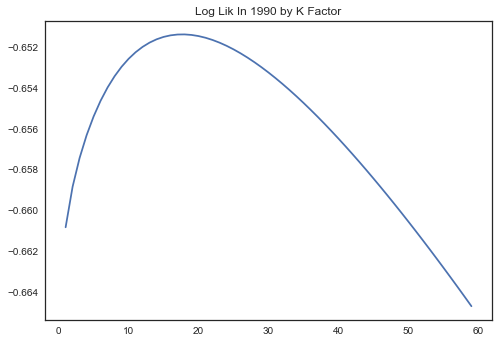

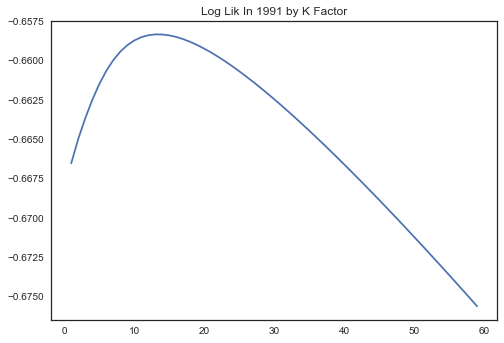

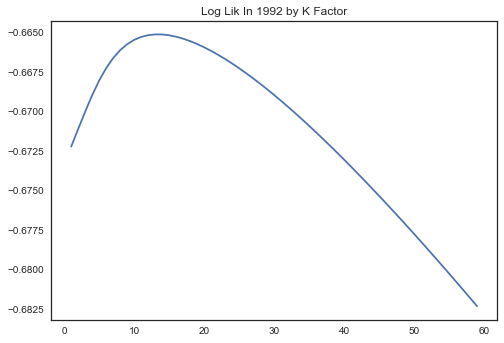

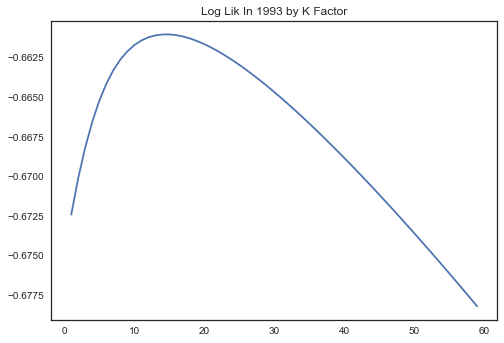

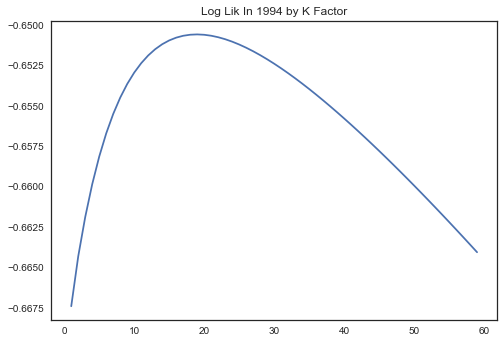

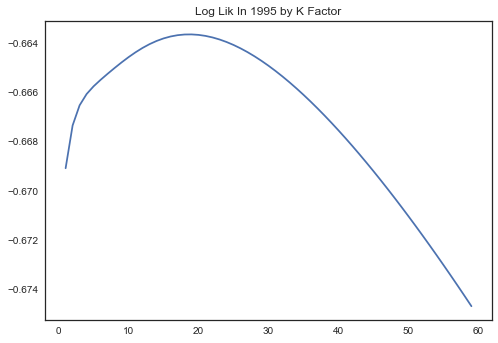

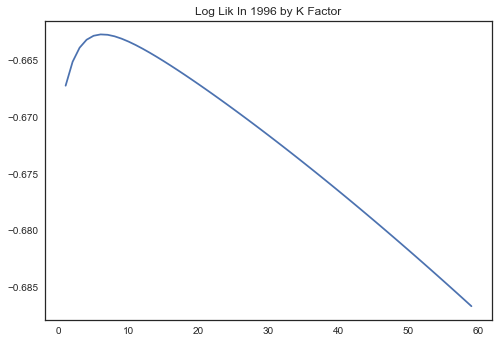

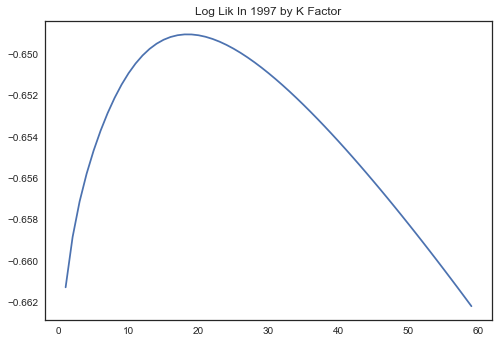

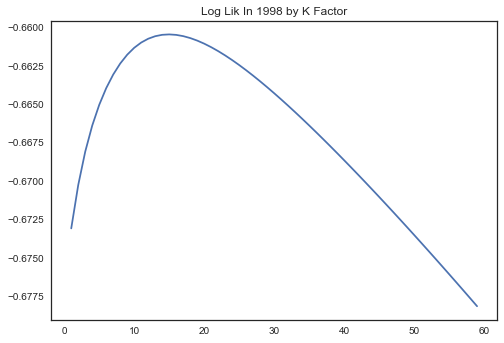

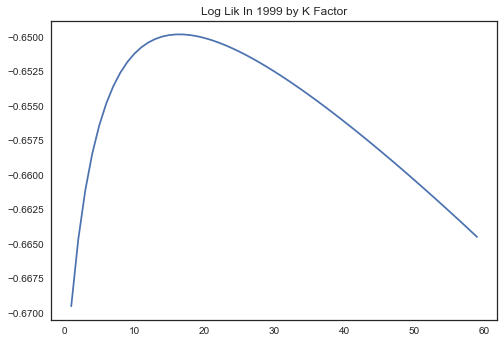

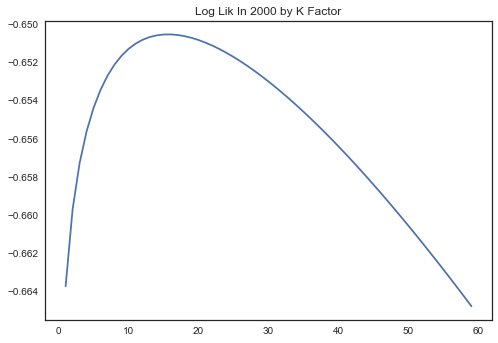

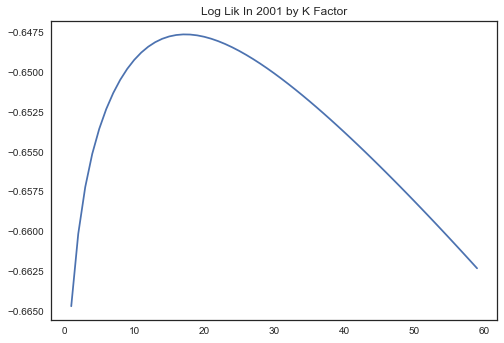

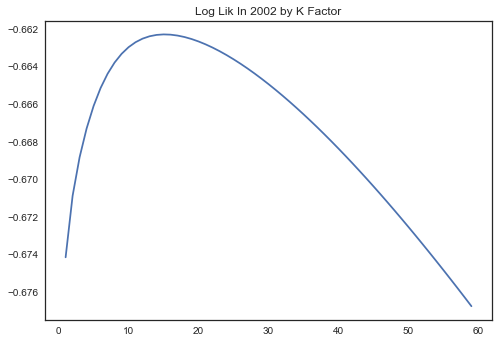

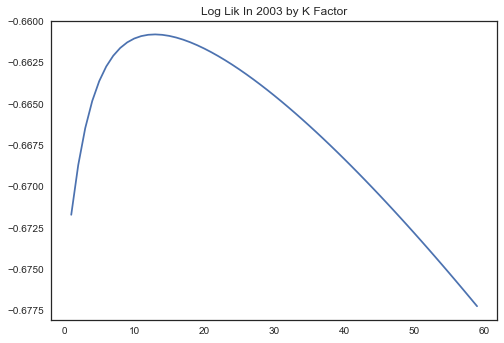

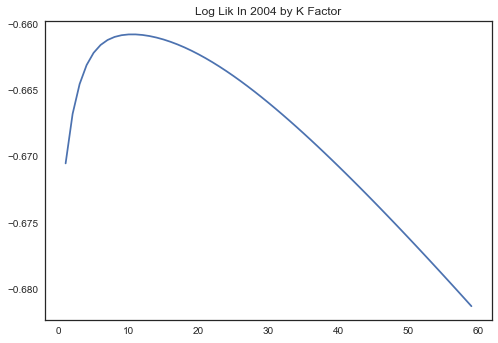

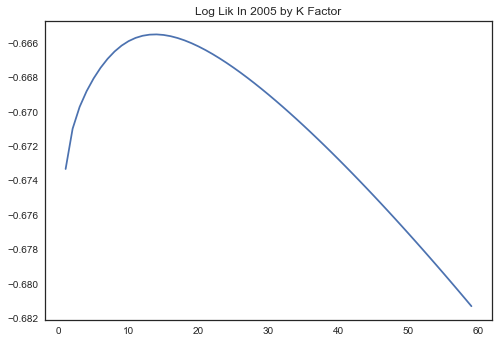

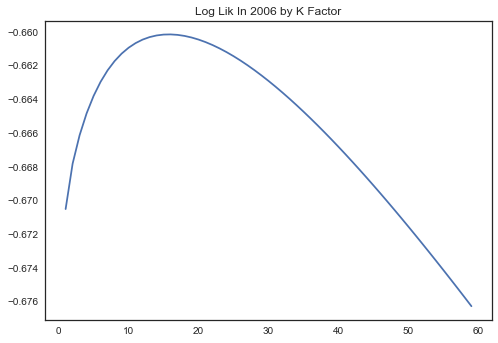

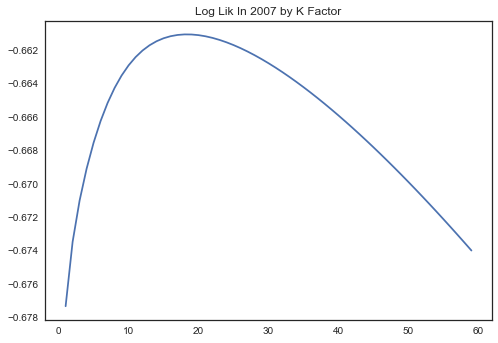

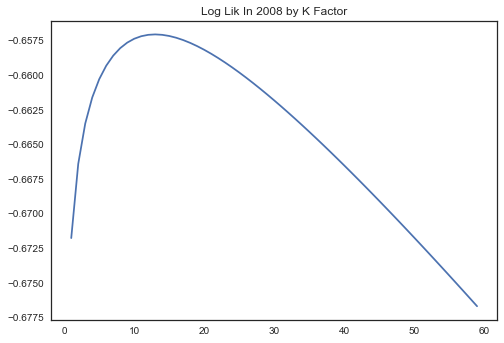

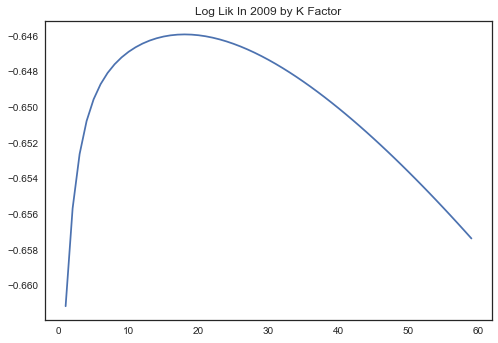

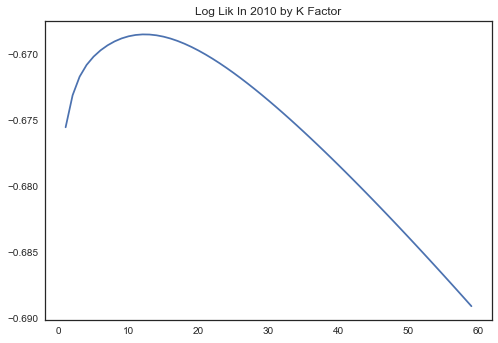

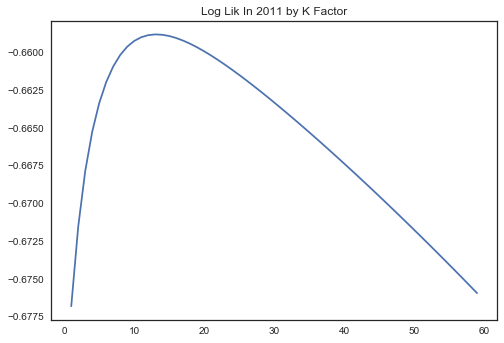

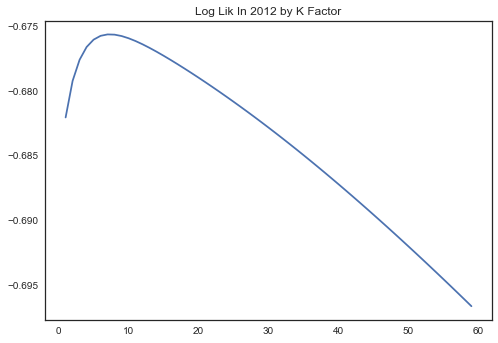

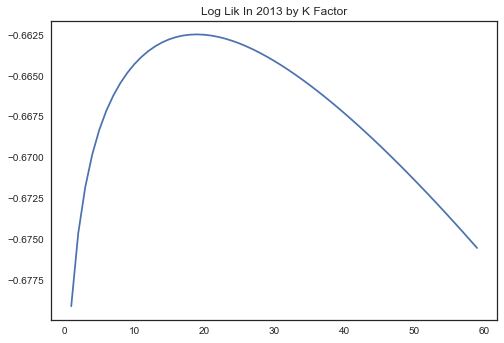

In [149]:
for i in range(1983, 2014, 1):
    yeardf=constantdf[constantdf['Year']==i].reset_index()
    plt.plot(yeardf['KFactor'], yeardf['AverageLogLik'])
    plt.title('Log Lik In ' +str(i) + ' by K Factor')
    plt.show()

In [ ]:
logliksums4
contourcols=['LogLik', 'Burn In', 'HFA', 'k']
contourdf=pd.DataFrame(logliksums4, columns=contourcols)
contourdf

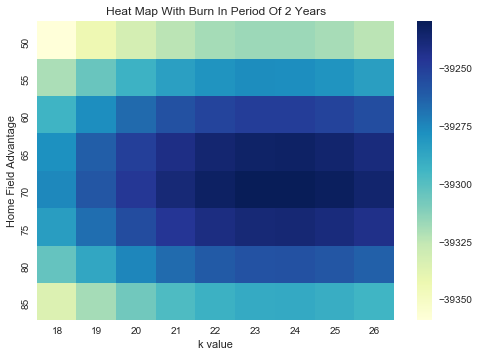

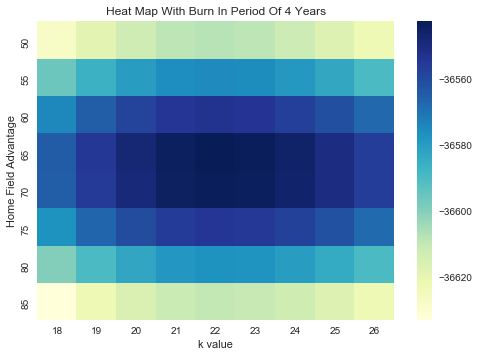

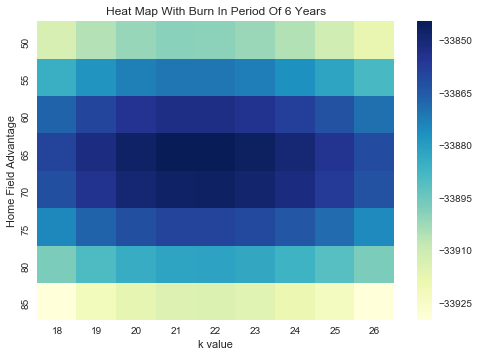

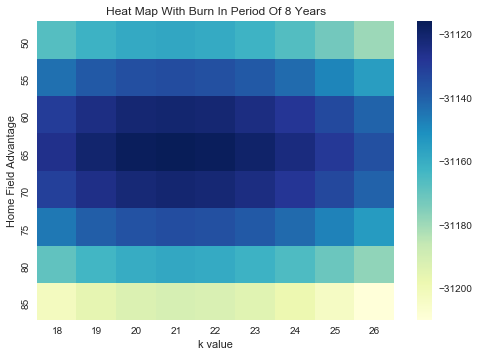

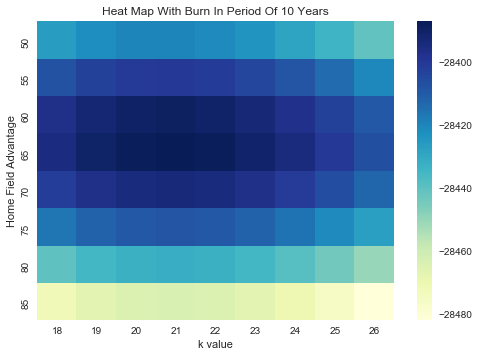

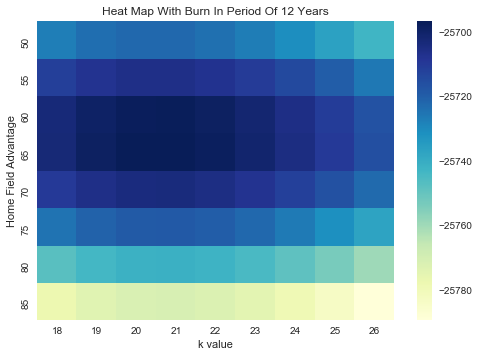

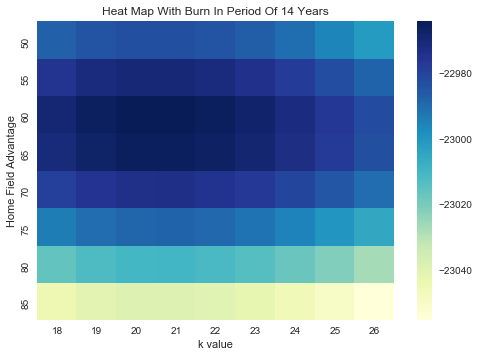

In [136]:
for i in range(2,16,2):
    plotdf=contourdf[contourdf['Burn In']==i].reset_index()
    plots = plotdf.pivot("HFA", "k", "LogLik")
    sns.heatmap(plots, cmap="YlGnBu")
    plt.xlabel('k value')
    plt.ylabel('Home Field Advantage')
    plt.title('Heat Map With Burn In Period Of ' + str(i) + ' Years')
    plt.show()


In [137]:
minks2=[]
for i in range(2,15):
    test=homefielddf[homefielddf['Burn In']==i].reset_index()
    index=test.loc[test['loglik'].idxmax()]
    #print([index['loglik']])
    minks2.append([index['Burn In'], index['Home Field'], index['K Factor']])
minks2

[[2.0, 70.0, 24.0],
 [3.0, 70.0, 23.0],
 [4.0, 65.0, 22.0],
 [5.0, 65.0, 22.0],
 [6.0, 65.0, 22.0],
 [7.0, 65.0, 22.0],
 [8.0, 65.0, 21.0],
 [9.0, 65.0, 21.0],
 [10.0, 65.0, 21.0],
 [11.0, 65.0, 21.0],
 [12.0, 65.0, 21.0],
 [13.0, 60.0, 20.0],
 [14.0, 60.0, 21.0]]

In [153]:
initialrows=[]
for i in range(len(fulldf['home'].unique())):
    Team=fulldf['home'].unique()[i]
    Teamdf=fulldf[fulldf['home']==Team].reset_index()
    Tier=int(Teamdf['tier'][0])
    initialrow=[Team, Tier]
    initialrows.append(initialrow)
print(initialrows)
for a in range(len(initialrows)):
    Elodictionary[initialrows[a][0]]=initvalues[initialrows[a][1]-1]

[['West Ham United', 1], ['Crystal Palace', 2], ['Aston Villa', 1], ['Grimsby Town', 2], ['Rochdale', 4], ['Exeter City', 3], ['Chesterfield', 4], ['Leeds United', 2], ['Nottingham Forest', 1], ['Chester', 4], ['Oldham Athletic', 2], ['Portsmouth', 2], ['Stockport County', 4], ['Bristol City', 4], ['Manchester United', 1], ['Sheffield United', 3], ['Blackpool', 4], ['Swansea City', 2], ['Leyton Orient', 3], ['AFC Bournemouth', 3], ['Aldershot', 4], ['Bolton Wanderers', 3], ['Leicester City', 1], ['Hull City', 3], ['Brentford', 3], ['Southend United', 3], ['Ipswich Town', 1], ['Tranmere Rovers', 4], ['Darlington', 4], ['Chelsea', 2], ['Everton', 1], ['Blackburn Rovers', 2], ['Port Vale', 3], ['Sunderland', 1], ['Oxford United', 3], ['Barnsley', 2], ['Plymouth Argyle', 3], ['Watford', 1], ['Arsenal', 1], ['Carlisle United', 2], ['Wolverhampton Wanderers', 1], ['Halifax Town', 4], ['Doncaster Rovers', 4], ['Charlton Athletic', 2], ['Newport County', 3], ['Peterborough United', 4], ['Newca

In [152]:
initialrow

['Preston North End', 3]